In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import h5py

In [4]:
import matplotlib.pyplot as plt

In [5]:
# !pip install tensorflow

In [6]:
from tensorflow import keras

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import KFold

In [9]:
import tensorflow as tf

In [10]:
data_path = "TCIR-ALL_2017.h5"
data_info = pd.read_hdf(data_path, key = 'info', mode = 'r')
with h5py.File(data_path, 'r') as hf:
    data_matrix = hf['matrix'][:]

In [11]:
data_info.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017041606,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017041609,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017041612,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017041615,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017041618,55.0,255.0,986.0


In [12]:
# here id is the id no. of the cyclone 
# lon is the longitude 
# lat is the latitude 
# vmax is the intensity 
# "Minimum Sea Level Presbure" is MSLP for Cyclone.

In [13]:
print("minimum_intensity", data_info['Vmax'].min())

minimum_intensity 15.0


In [14]:
print("maximum_intensity", data_info['Vmax'].max())

maximum_intensity 155.0


In [15]:
print("mean_intensity", round(data_info['Vmax'].mean(),3))

mean_intensity 48.136


In [16]:
import pandas_profiling as pp

In [17]:
# profile = pp.ProfileReport(data_info)
# profile.to_file("output.html")

In [18]:
data_info.sample(5)

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
4300,WPAC,201727W,128.9,27.8,2017102809,65.0,162.5,975.0
39,ATLN,201701L,-44.6,39.5,2017042103,45.0,67.5,990.0
1816,EPAC,201713E,-126.8,16.1,2017082012,65.0,57.5,990.0
3544,WPAC,201707W,134.6,33.6,2017080703,65.0,108.8,968.0
2941,SH,201714S,188.7,-25.1,2017041012,30.0,0.0,1000.0


In [19]:
data_info.shape

(4580, 8)

In [20]:
4580*8

36640

In [21]:
data_info.size

36640

In [22]:
# data_matrix

In [23]:
np.shape(data_matrix)

(4580, 201, 201, 4)

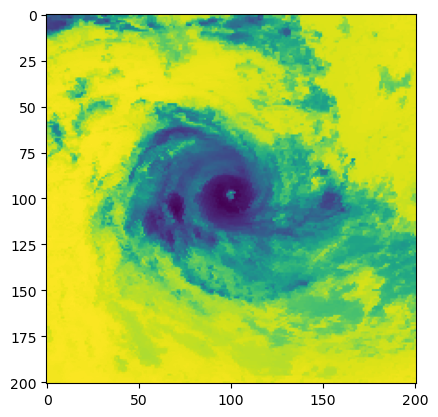

In [122]:
img = data_matrix[400,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img)

In [25]:
pos

In [26]:
pos = ax.imshow(img)

In [27]:
print(ax.imshow(img))

AxesImage(143.2,52.8;369.6x369.6)


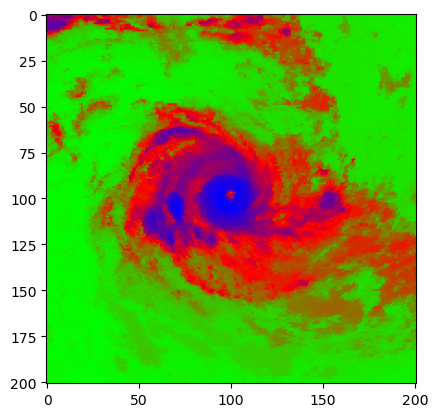

In [121]:
img = data_matrix[400,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.brg)

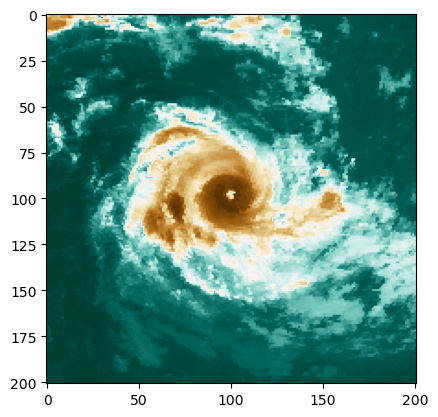

In [120]:
img = data_matrix[400,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.BrBG)

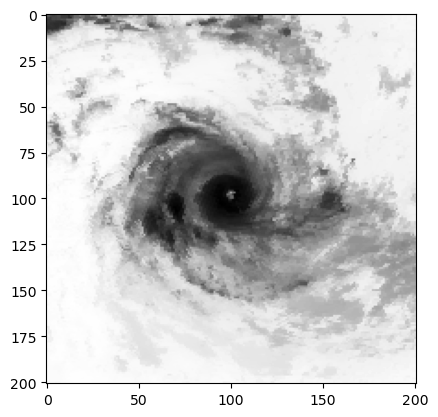

In [125]:
img = data_matrix[400,:,:,0].copy()
fig, ax = plt.subplots()
pos = ax.imshow(img,plt.cm.binary_r)

In [30]:
# data_info = data_info.assign(time=pd.to_datetime(data_info.time, format = r'%y%m%d%H'))

In [31]:
data_info.head()

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,201701L,-50.3,35.8,2017041606,55.0,270.0,992.0
1,ATLN,201701L,-49.9,35.5,2017041609,55.0,270.0,990.0
2,ATLN,201701L,-49.5,35.1,2017041612,55.0,270.0,989.0
3,ATLN,201701L,-49.1,34.8,2017041615,55.0,262.5,988.0
4,ATLN,201701L,-48.7,34.4,2017041618,55.0,255.0,986.0


In [32]:
# data_info = data_info.assign(time=pd.to_datetime(data_info.time,format=r'%y%m%d%H'))

In [33]:
data_info.sample(5)

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
3414,WPAC,201707W,154.0,27.9,2017072121,40.0,115.0,993.0
677,ATLN,201713L,-94.6,21.6,2017090706,70.0,37.5,985.0
3026,SH,201716S,165.9,-19.8,2017040921,85.0,110.6,965.0
649,ATLN,201712L,-69.4,38.9,2017092315,30.0,0.0,1006.0
4092,WPAC,201721W,106.6,17.8,2017091503,88.0,117.5,962.0


In [34]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 0 to 4579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   data_set   4580 non-null   object 
 1   ID         4580 non-null   object 
 2   lon        4580 non-null   float64
 3   lat        4580 non-null   float64
 4   time       4580 non-null   object 
 5   Vmax       4580 non-null   float64
 6   R35_4qAVG  4580 non-null   float64
 7   MSLP       4580 non-null   float64
dtypes: float64(5), object(3)
memory usage: 322.0+ KB


In [35]:
data_info['time']=data_info['time'].astype(int)

In [36]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 0 to 4579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   data_set   4580 non-null   object 
 1   ID         4580 non-null   object 
 2   lon        4580 non-null   float64
 3   lat        4580 non-null   float64
 4   time       4580 non-null   int32  
 5   Vmax       4580 non-null   float64
 6   R35_4qAVG  4580 non-null   float64
 7   MSLP       4580 non-null   float64
dtypes: float64(5), int32(1), object(2)
memory usage: 304.1+ KB


In [37]:
# data_info = data_info.append(time=pd.to_datetime(data_info.time,format=r'%y%m%d%H'))

In [38]:
# keep only IR and PMW
x_irpmw = data_matrix[:,:,:,0::3]
y = data_info['Vmax'].values[:,np.newaxis]

In [39]:
x_irpmw[np.isnan(x_irpmw)] = 0
x_irpmw[x_irpmw > 1000] = 0

In [40]:
class Preprocessing(keras.layers.Layer):
    def __init__(self, name=None):
        super(Preprocessing, self).__init__(name=name)
    def call(self, inputs, training = None):
        if training:
            inputs = tf.image.rot90(inputs, k= np.random.randint(4))
        return tf.image.central_crop(inputs, 0.5)

In [41]:
# Alexnet CNN
def train_val_model(train_x,train_y,val_x,val_y, n_epochs, batch_size):
    reg_param = 1e-5
    train_X = tf.convert_to_tensor(train_x)
    train_Y = tf.convert_to_tensor(train_y)
    val_X = tf.convert_to_tensor(val_x)
    val_Y = tf.convert_to_tensor(val_y)
    
    weights_initializer = keras.initializers.GlorotUniform()
    
    model = keras.models.Sequential([
        Preprocessing(),
        keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=4, padding ='valid', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),

        keras.layers.Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'), 
        keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),

        keras.layers.Conv2D (filters=384, kernel_size=(3,3), padding='same', activation='relu'),

        keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'), 
        keras.layers.Conv2D (filters=256, kernel_size=(3,3), padding='same', activation='relu'),

        keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),

        keras.layers.Flatten(),

        keras.layers.Dense (4096, activation='relu'),

        keras.layers.Dropout (0.4), 
        keras.layers.Dense (4096, activation='relu'),

        keras.layers.Dropout (0.4), 
        keras.layers.Dense(1, activation= 'relu'),
    ])
    # compiling the model 
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4,beta_1=0.99,beta_2=0.9999),
                  loss = 'mean_squared_error',
                  metrics=['mean_squared_error'],
                 )
    # training the model
    history = model.fit(train_X,train_Y,
                        epochs=n_epochs,
                        batch_size=batch_size,
                        verbose=1
                       )
    val_score = model.evaluate(val_X,val_Y)
    print("Val score:", val_score)
    return history, val_score, model

In [42]:
model_history=[]
val_scores=[]
n_epochs=50
batch_size=256
train_x,val_x,train_y,val_y = train_test_split(x_irpmw,y, random_state=101, test_size=0.1)
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y, random_state=101, test_size=0.1)
history,val_score,model=train_val_model(train_x,train_y,val_x,val_y,n_epochs,batch_size)
model_history.append(history)
val_scores.append(val_score)

Epoch 1/50
15/15 [==============================] - 42s 3s/step - loss: 39691.1055 - mean_squared_error: 39691.1055
Epoch 2/50
15/15 [==============================] - 42s 3s/step - loss: 928.0602 - mean_squared_error: 928.0602
Epoch 3/50
15/15 [==============================] - 43s 3s/step - loss: 882.2480 - mean_squared_error: 882.2480
Epoch 4/50
15/15 [==============================] - 42s 3s/step - loss: 863.0993 - mean_squared_error: 863.0993
Epoch 5/50
15/15 [==============================] - 44s 3s/step - loss: 858.2643 - mean_squared_error: 858.2643
Epoch 6/50
15/15 [==============================] - 44s 3s/step - loss: 840.4743 - mean_squared_error: 840.4743
Epoch 7/50
15/15 [==============================] - 42s 3s/step - loss: 848.0590 - mean_squared_error: 848.0590
Epoch 8/50
15/15 [==============================] - 44s 3s/step - loss: 806.6816 - mean_squared_error: 806.6816
Epoch 9/50
15/15 [==============================] - 44s 3s/step - loss: 799.0579 - mean_squared_erro

In [43]:
model.predict(test_x)

13/13 [==============================] - 1s 52ms/step


array([[ 59.518055],
       [ 37.709805],
       [ 29.433681],
       [ 62.553375],
       [ 50.022312],
       [ 38.809826],
       [ 64.54685 ],
       [ 48.802143],
       [ 36.246758],
       [107.84832 ],
       [ 76.41063 ],
       [ 27.781698],
       [ 41.27273 ],
       [ 51.718613],
       [ 63.62045 ],
       [ 43.047726],
       [ 46.972004],
       [ 27.17524 ],
       [ 53.720287],
       [ 62.33765 ],
       [ 68.78841 ],
       [ 29.735634],
       [ 32.687588],
       [ 69.88499 ],
       [ 67.571205],
       [ 60.40721 ],
       [ 33.032413],
       [ 40.07093 ],
       [ 35.973446],
       [ 29.582552],
       [ 56.487415],
       [ 66.82749 ],
       [101.493675],
       [ 35.404736],
       [ 27.28226 ],
       [ 39.698666],
       [ 62.761475],
       [ 30.093155],
       [ 27.558424],
       [ 36.11216 ],
       [ 82.42892 ],
       [ 87.46836 ],
       [ 48.6051  ],
       [ 56.21152 ],
       [ 33.096127],
       [ 48.647976],
       [ 65.46941 ],
       [ 34.8

In [44]:
y_pred = model.predict(test_x)
print("testing...")
score = model.evaluate(test_x,test_y,
                      batch_size=16,verbose=1)
print("Test accuracy-> ",score[1])

13/13 [==============================] - 1s 50ms/step
testing...
26/26 [==============================] - 1s 31ms/step - loss: 337.5085 - mean_squared_error: 337.5085
Test accuracy->  337.50848388671875


In [45]:
abcd = []
for x in y_pred:
    abcd.append(int(x))

In [46]:
cate=[]              #intensity valuation according to nasa
for x in abcd:
    if x<=33:
        cate.append("Tropical Depression")
    elif  x>33 and x<=63:
        cate.append('Tropical Strom')
    elif x>63 and x<=129:
        cate.append("Typhoon")
    elif x>129:
        cate.append("Super Typhoon")

In [47]:
cate_data = list(zip(abcd,cate))

In [48]:
intensity_df = pd.DataFrame(cate_data,columns=['Intensity(knot)','Category'])

In [49]:
intensity_df

,Intensity(knot),Category
0,59,Tropical Strom
1,37,Tropical Strom
2,29,Tropical Depression
3,62,Tropical Strom
4,50,Tropical Strom
...,...,...
408,30,Tropical Depression
409,42,Tropical Strom
410,38,Tropical Strom
411,32,Tropical Depression


In [50]:
# now our model can predict the intensity and the category of the cyclone

In [51]:
# The Knot is a unit of speed equal to one nautical mile per hour, exactly 1.852 km/h

In [52]:
# model

In [53]:
# import pickle

In [54]:
# pickle.dump(model, open('CNN_model.pkl','wb'))

In [55]:
# the CNN model is ready and saved.... the size of our cnn model is 283MB

In [64]:
# trying deep cnn
# hypertuning the parameters
def train_val_model(train_x,train_y,val_x,val_y, n_epochs, batch_size):
    reg_param = 1e-5
    train_X = tf.convert_to_tensor(train_x)
    train_Y = tf.convert_to_tensor(train_y)
    val_X = tf.convert_to_tensor(val_x)
    val_Y = tf.convert_to_tensor(val_y)
    
    weights_initializer = keras.initializers.GlorotUniform()
    
    model = keras.models.Sequential([
        Preprocessing(),
        keras.layers.Conv2D(filters=16, kernel_size=4, strides=2, padding ='valid', activation='relu'),
        keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='valid', activation='relu'), 
        keras.layers.Conv2D (filters=64, kernel_size=3,  strides=2,padding='valid', activation='relu'),
        keras.layers.Conv2D (filters=128, kernel_size=3, strides=2, padding='valid', activation='relu'),
        keras.layers.Flatten(),

        keras.layers.Dense (256, activation='relu',kernel_initializer=weights_initializer),
        keras.layers.Dense (128, activation='relu',kernel_initializer=weights_initializer),
        keras.layers.Dense (1, activation='relu',kernel_initializer=weights_initializer),
    ])
    # compiling the model 
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4,beta_1=0.99,beta_2=0.9999),
                  loss = 'mean_squared_error',
                  metrics=['mean_squared_error'],
                 )
    # training the model
    history = model.fit(train_X,train_Y,
                        epochs=n_epochs,
                        batch_size=batch_size,
                        verbose=1
                       )
    val_score = model.evaluate(val_X,val_Y)
    print("Val score:", val_score)
    return history, val_score, model

In [65]:
model_history=[]
val_scores=[]
n_epochs=50
batch_size=256
train_x,val_x,train_y,val_y = train_test_split(x_irpmw,y, random_state=101, test_size=0.1)
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y, random_state=101, test_size=0.1)
history,val_score,model=train_val_model(train_x,train_y,val_x,val_y,n_epochs,batch_size)
model_history.append(history)
val_scores.append(val_score)

Epoch 1/50


C:\Users\Sudhanshu\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


15/15 [==============================] - 5s 222ms/step - loss: 1522.7933 - mean_squared_error: 1522.7933
Epoch 2/50
15/15 [==============================] - 3s 219ms/step - loss: 857.3394 - mean_squared_error: 857.3394
Epoch 3/50
15/15 [==============================] - 3s 217ms/step - loss: 828.4789 - mean_squared_error: 828.4789
Epoch 4/50
15/15 [==============================] - 3s 213ms/step - loss: 819.5280 - mean_squared_error: 819.5280
Epoch 5/50
15/15 [==============================] - 3s 218ms/step - loss: 796.6636 - mean_squared_error: 796.6636
Epoch 6/50
15/15 [==============================] - 3s 217ms/step - loss: 769.5164 - mean_squared_error: 769.5164
Epoch 7/50
15/15 [==============================] - 3s 214ms/step - loss: 757.7886 - mean_squared_error: 757.7886
Epoch 8/50
15/15 [==============================] - 3s 215ms/step - loss: 682.5573 - mean_squared_error: 682.5573
Epoch 9/50
15/15 [==============================] - 3s 231ms/step - loss: 599.5507 - mean_squared

In [58]:
# model.predict(test_x)

In [66]:
y_pred = model.predict(test_x)
print("testing...")
score = model.evaluate(test_x,test_y,
                      batch_size=16,verbose=1)
print("Test accuracy-> ",score[1])

13/13 [==============================] - 0s 8ms/step
testing...
26/26 [==============================] - 0s 5ms/step - loss: 315.6898 - mean_squared_error: 315.6898
Test accuracy->  315.6898498535156


In [71]:
model_history=[]
val_scores=[]
n_epochs=50
batch_size=256
train_x,val_x,train_y,val_y = train_test_split(x_irpmw,y, random_state=101, test_size=0.1)
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y, random_state=101, test_size=0.1)
history,val_score,model=train_val_model(train_x,train_y,val_x,val_y,n_epochs,batch_size)
model_history.append(history)
val_scores.append(val_score)

Epoch 1/50
15/15 [==============================] - 4s 187ms/step - loss: 1118.8314 - mean_squared_error: 1118.8314
Epoch 2/50
15/15 [==============================] - 3s 181ms/step - loss: 848.0101 - mean_squared_error: 848.0101
Epoch 3/50
15/15 [==============================] - 3s 177ms/step - loss: 811.2533 - mean_squared_error: 811.2533
Epoch 4/50
15/15 [==============================] - 3s 201ms/step - loss: 791.5589 - mean_squared_error: 791.5589
Epoch 5/50
15/15 [==============================] - 3s 193ms/step - loss: 760.9297 - mean_squared_error: 760.9297
Epoch 6/50
15/15 [==============================] - 3s 182ms/step - loss: 677.4879 - mean_squared_error: 677.4879
Epoch 7/50
15/15 [==============================] - 3s 189ms/step - loss: 570.4167 - mean_squared_error: 570.4167
Epoch 8/50
15/15 [==============================] - 3s 187ms/step - loss: 486.4951 - mean_squared_error: 486.4951
Epoch 9/50
15/15 [==============================] - 3s 190ms/step - loss: 434.5304 - m

In [74]:
# changing the random state and the batchsize
# model_history=[]
# val_scores=[]
# n_epochs=50
# batch_size=225
# train_x,val_x,train_y,val_y = train_test_split(x_irpmw,y, random_state=105, test_size=0.1)
# train_x,test_x,train_y,test_y = train_test_split(train_x,train_y, random_state=105, test_size=0.1)
# history,val_score,model=train_val_model(train_x,train_y,val_x,val_y,n_epochs,batch_size)
# model_history.append(history)
# val_scores.append(val_score)

# ## Val score: [316.7001953125, 316.7001953125]

In [62]:
# model.predict(test_x)

In [75]:
y_pred = model.predict(test_x)
print("testing...")
score = model.evaluate(test_x,test_y,
                      batch_size=16,verbose=1)
print("Test accuracy-> ",score[1])
# # Test accuracy->  247.21420288085938 ??

13/13 [==============================] - 0s 12ms/step
testing...
26/26 [==============================] - 0s 8ms/step - loss: 209.6002 - mean_squared_error: 209.6002
Test accuracy->  209.6002197265625


In [73]:
# after hypertuning the parameters and applying the deep cnn 
# mean_squared_error: 209.6002

In [76]:
model

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing_4 (Preprocess  (None, 101, 101, 2)      0         
 ing)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 49, 49, 16)        528       
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                      

In [85]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x000001DE8987DD60>>

In [92]:
model.predict(test_x)

13/13 [==============================] - 0s 8ms/step


array([[ 56.179447],
       [ 35.447357],
       [ 30.120855],
       [ 62.645428],
       [ 27.746923],
       [ 37.94765 ],
       [ 45.81661 ],
       [ 53.34924 ],
       [ 38.61219 ],
       [138.04831 ],
       [ 84.3971  ],
       [ 32.894154],
       [ 29.819075],
       [ 59.740135],
       [ 94.289505],
       [ 35.533955],
       [ 83.4217  ],
       [ 29.44658 ],
       [ 63.02097 ],
       [ 40.98383 ],
       [ 51.658466],
       [ 33.1953  ],
       [ 40.47159 ],
       [ 74.32663 ],
       [ 85.36287 ],
       [ 45.402477],
       [ 43.772316],
       [ 34.061806],
       [ 28.624327],
       [ 28.810335],
       [ 44.346165],
       [ 73.3848  ],
       [100.30343 ],
       [ 42.545506],
       [ 39.598145],
       [ 40.89507 ],
       [ 43.1893  ],
       [ 26.662447],
       [ 29.160845],
       [ 47.47901 ],
       [ 82.87787 ],
       [ 97.63195 ],
       [ 44.68936 ],
       [ 85.23402 ],
       [ 40.081837],
       [ 41.226173],
       [ 53.89299 ],
       [ 48.6

In [93]:
abcd = []
for x in y_pred:
    abcd.append(int(x))

In [94]:
cate=[]              #intensity valuation according to nasa
for x in abcd:
    if x<=33:
        cate.append("Tropical Depression")
    elif  x>33 and x<=63:
        cate.append('Tropical Strom')
    elif x>63 and x<=129:
        cate.append("Typhoon")
    elif x>129:
        cate.append("Super Typhoon")

In [95]:
cate_data = list(zip(abcd,cate))

In [96]:
intensity_df2Dcnn = pd.DataFrame(cate_data,columns=['Intensity(knot)','Category'])

In [97]:
intensity_df2Dcnn.sample(10)

,Intensity(knot),Category
304,50,Tropical Strom
376,61,Tropical Strom
235,48,Tropical Strom
180,70,Typhoon
168,28,Tropical Depression
345,35,Tropical Strom
384,44,Tropical Strom
282,44,Tropical Strom
119,67,Typhoon
347,38,Tropical Strom


In [101]:
intensity_df.last    # alexnet cnn

<bound method NDFrame.last of      Intensity(knot)             Category
0                 59       Tropical Strom
1                 37       Tropical Strom
2                 29  Tropical Depression
3                 62       Tropical Strom
4                 50       Tropical Strom
..               ...                  ...
408               30  Tropical Depression
409               42       Tropical Strom
410               38       Tropical Strom
411               32  Tropical Depression
412               88              Typhoon

[413 rows x 2 columns]>

In [103]:
intensity_df2Dcnn.last  # deep cnn 

<bound method NDFrame.last of      Intensity(knot)             Category
0                 56       Tropical Strom
1                 35       Tropical Strom
2                 30  Tropical Depression
3                 62       Tropical Strom
4                 27  Tropical Depression
..               ...                  ...
408               49       Tropical Strom
409               32  Tropical Depression
410               34       Tropical Strom
411               38       Tropical Strom
412               99              Typhoon

[413 rows x 2 columns]>

In [128]:
test_x.shape

(413, 201, 201, 2)

In [126]:
import pickle as pp

In [127]:
pp.dump(model, open('DeepCNN_model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\preprocessing
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
Fi

In [129]:
from keras.models import Model
# save the model to an HDF5 file
# model.save("my_model.h5")

In [132]:
model.save("DeepCNN_model.h5")

In [133]:
config = model.get_config()

In [134]:
config

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 201, 201, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'preprocessing_4_input'}},
  {'class_name': 'Preprocessing',
   'config': {'name': 'preprocessing_4',
    'trainable': True,
    'dtype': 'float32'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_17',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (4, 4),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'cl

In [135]:
model.evaluate(test_x,test_y,
                      batch_size=16,verbose=1)

26/26 [==============================] - 0s 6ms/step - loss: 209.6002 - mean_squared_error: 209.6002


[209.6002197265625, 209.6002197265625]

In [136]:
model.save_weights('savedModel/')

In [137]:
model.load_weights('savedModel/')